# 상관관계 분석 (Correlation Analysis)

<hr>

## ✅상관관계 분석과 상관계수
- 두 변수 사이 관계의 강도와 방향을 파악하는 통계 기법
- 상관관계를 수치로 나타내어 정량화하는 방법
- 상관관계의 강도를 나타낸 수치: **상관계수(Correlation coefficient)**
- 변수 x와 y가 있을 때 두 변수의 상관관계는 다음 세 가지 중 하나
    - 양의 상관관계: 변수 x가 커질수록 변수 y도 커짐
    - 음의 상관관계: 변수 x가 커질수록 변수 y는 작아짐
    - 상관관계 없음: 변수 x가 커질 때 변수 y는 커질 수도, 작아질 수도 있음
  ![Corr1](img/Corr1.png)
- 두 변수를 x축과 y축으로 하여 나타낸 그래프
![Corr2](img/Corr2.png)

## ✅상관관계 분석의 세 가지 방법
1. 피어슨 상관분석(Pearson Correlation Analysis)
    - 가장 일반적인 상관분석 방법
2. 스피어만 상관분석(Spearman Correlation Analysis)
    - 두 변수가 정규성(normality)을 보이지 않을 때 사용하는 방법
3. 켄달 상관분석(Kendall Correlation Anaylsis)
    - 표본 데이터가 적고 동점이 많을 때 사용하기 적합한 방법

<br>

***참고**: 상관계수만 가지고 두 변수 사이의 상관성이 있는 지 없는 지는 판단할 수 없음. 두 변수에 선형 상관관계가 아닌 다른 상관관계가 있을 수 있음*

<hr>

## ✅상관분석의 세 가지 방법 실습

#### *: 어린이가 영어 동요에 노출된 시간과 영어 점수와의 상관관계 분석*

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 영어 동요 노출 시간
engListening = [30, 60, 90]
# 영어 점수
engScore = [70, 80, 90]

In [4]:
# 리스트를 데이터프레임으로 변환
data = {'engListening':engListening, 'engScore':engScore}
df = pd.DataFrame(data)
df

,engListening,engScore
0,30,70
1,60,80
2,90,90


In [5]:
# 상관분석 수행
df.corr(method='pearson')

,engListening,engScore
engListening,1.0,1.0
engScore,1.0,1.0


In [6]:
# 5명의 어린이 데이터 추가
engReading = [40, 45, 60, 20, 15, 70, 60, 80]
engClass = [60, 120, 120, 60, 60, 180, 120, 120]

new_data = pd.DataFrame({'engListening' : [31, 32, 69, 92, 99],
                        'engScore' : [70, 71, 85, 90, 92]})
new_col = pd.DataFrame({'engReading' : engReading,
                        'engClass' : engClass})
new_data, new_col

(   engListening  engScore
 0            31        70
 1            32        71
 2            69        85
 3            92        90
 4            99        92,
    engReading  engClass
 0          40        60
 1          45       120
 2          60       120
 3          20        60
 4          15        60
 5          70       180
 6          60       120
 7          80       120)

In [7]:
new_df = pd.concat([df, new_data], ignore_index = True)
new_df

,engListening,engScore
0,30,70
1,60,80
2,90,90
3,31,70
4,32,71
5,69,85
6,92,90
7,99,92


In [8]:
new_df = pd.concat([new_df, new_col], axis=1)
new_df

,engListening,engScore,engReading,engClass
0,30,70,40,60
1,60,80,45,120
2,90,90,60,120
3,31,70,20,60
4,32,71,15,60
5,69,85,70,180
6,92,90,60,120
7,99,92,80,120


<AxesSubplot: xlabel='engListening', ylabel='engScore'>

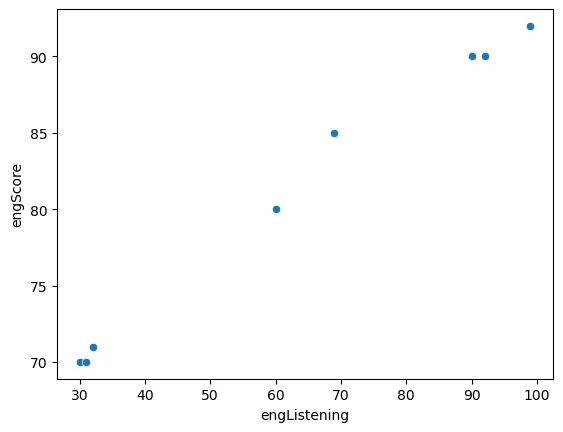

In [9]:
# 그래프로 확인
sns.scatterplot(data=new_df, x='engListening', y='engScore')

In [10]:
# 1) 피어슨 상관분석 수행
pearson_coef = new_df.corr(method='pearson')
pearson_coef

,engListening,engScore,engReading,engClass
engListening,1.000000,0.995829,0.877201,0.703028
engScore,0.995829,1.000000,0.894111,0.759453
engReading,0.877201,0.894111,1.000000,0.808755
engClass,0.703028,0.759453,0.808755,1.000000


In [11]:
# 2) 스피어만 상관분석 수행
spearman_coef = new_df.corr(method='spearman')
spearman_coef

,engListening,engScore,engReading,engClass
engListening,1.000000,0.988024,0.826362,0.717256
engScore,0.988024,1.000000,0.848500,0.725950
engReading,0.826362,0.848500,1.000000,0.852757
engClass,0.717256,0.725950,0.852757,1.000000


In [12]:
# 3) 켄달 상관분석 수행
kendall_coef = new_df.corr(method='kendall')
kendall_coef

,engListening,engScore,engReading,engClass
engListening,1.000000,0.963624,0.618284,0.563621
engScore,0.963624,1.000000,0.679366,0.584898
engReading,0.618284,0.679366,1.000000,0.750568
engClass,0.563621,0.584898,0.750568,1.000000


<hr>

## ✅피어슨 상관분석과 스피어만 상관분석의 차이점
- 피어슨 상관분석은 두 연속 변수 간의 선형 관계를 측정하는 반면, 스피어만 상관분석은 선형인지 여부에 관계 없이 변수 간의 단조 연관성(Monotonic relationship)을 측정
    - ![Corr3](img/Corr3.png)
- 피어슨 상관관계가 스피어만 상관관계보다 데이터의 이상치(Outlier)에 민감하게 반응

<hr>

## ✅켄달 상관분석의 특징
- 켄달 상관분석은 두 변수 간의 순위를 비교하여 연관성을 계산
- 한 변수가 증가할 때 다른 변수가 함께 증가하는 횟수와 감소하는 횟수를 측정하여 횟수의 차이를 상관계수로 표현하는 방법
- **순위로 표현**할 수 있는 데이터이거나, **표본 크키가 작거나**, 데이터의 **순위에 동률이 많을 때** 사용